In [1]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('SMSSpamCollection',sep='\t',names=['Action','Message'])
data.head()

,Action,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.Action.value_counts()             #ham messages is larger than spam

ham     4825
spam     747
Name: Action, dtype: int64

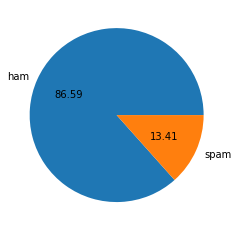

In [4]:
plt.pie(data.Action.value_counts(), labels=['ham','spam'],autopct='%0.2f' )         #approx 87% of data is ham and 123% of data is spam. Hence slightly data is imbalanced
plt.show()

In [5]:
lemitizing=WordNetLemmatizer()

In [6]:
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z]',' ',data.Message[i])
    review=review.lower()
    review=review.split()
    review=[lemitizing.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)
corpus[0:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
df=pd.DataFrame(X,columns=cv.get_feature_names())
df

,aa,aah,aathi,abi,ability,abiola,abj,able,absolutly,abt,...,zealand,zebra,zed,zero,zf,zhong,zindgi,zoe,zogtorius,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y=pd.get_dummies(data.Action,drop_first=True)
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y.spam,test_size=0.3)

In [11]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB().fit(X_train,y_train)
pred=nb.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,pred))           #Logistic Regression
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[1426   18]
 [  15  213]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1444
           1       0.92      0.93      0.93       228

    accuracy                           0.98      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672

0.9802631578947368


In [13]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(nb,open('model.pkl','wb'))